In [1]:
import sys

# 코랩의 경우 깃허브 저장소로부터 utils.py를 다운로드 합니다.
if 'google.colab' in sys.modules:
    !wget https://raw.githubusercontent.com/rickiepark/Generative_Deep_Learning_2nd_Edition/main/notebooks/utils.py
    !mkdir -p notebooks
    !mv utils.py notebooks

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import (
    layers,
    models,
    datasets,
    callbacks,
    losses,
    optimizers,
    metrics,
)

from scipy.stats import norm

# from notebooks.utils import display
from IPython.display import display
# ModuleNotFoundError: No module named 'notebooks'

# parameters

In [3]:
# parameters
IMAGE_SIZE = 32
BATCH_SIZE = 100
VALIDATION_SPLIT = 0.2
EMBEDDING_DIM = 2
EPOCHS = 5
BETA = 500

# 데이터 준비

In [4]:
import cv2
import os

image_dir = r'G:\내 드라이브\project_poster\movie_posters2'  # 'a' 폴더의 경로
target_size = (300,300)    # 원하는 크기 (높이, 너비)

# 이미지 목록을 저장할 리스트
images = []

# 디렉토리에서 모든 이미지 파일을 반복
for filename in os.listdir(image_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        img_path = os.path.join(image_dir, filename)
        
        # 이미지 읽기
        image = cv2.imread(img_path)

In [7]:
import os
import cv2
import numpy as np

def resize_without_padding(image, target_size):
    h, w = image.shape[:2]
    scale = min(target_size[0] / h, target_size[1] / w)
    new_size = (int(w * scale), int(h * scale))
    
    # 비율을 유지하면서 크기 조정
    resized_image = cv2.resize(image, new_size)
    
    return resized_image

# 이미지가 있는 디렉토리 경로
image_dir = r'G:\내 드라이브\project_poster\movie_posters2'  # 'a' 폴더의 경로
target_size = (300,300)    # 원하는 크기 (높이, 너비)

# 이미지 목록을 저장할 리스트
images = []

# 디렉토리에서 모든 이미지 파일을 반복
for filename in os.listdir(image_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        img_path = os.path.join(image_dir, filename)
        
        # 이미지 읽기
        image = cv2.imread(img_path)
        
        # 이미지 크기 조정
        resized_image = resize_without_padding(image, target_size)
        
        # 리스트에 추가
        images.append(resized_image)

print(f"{len(images)}개의 이미지를 불러왔습니다.")


217개의 이미지를 불러왔습니다.


In [8]:
# 데이터 로드
(x_train, y_train), (x_test, y_test) = images

ValueError: too many values to unpack (expected 2)

In [5]:
help(np.pad)

Help on _ArrayFunctionDispatcher in module numpy:

pad(array, pad_width, mode='constant', **kwargs)
    Pad an array.
    
    Parameters
    ----------
    array : array_like of rank N
        The array to pad.
    pad_width : {sequence, array_like, int}
        Number of values padded to the edges of each axis.
        ``((before_1, after_1), ... (before_N, after_N))`` unique pad widths
        for each axis.
        ``(before, after)`` or ``((before, after),)`` yields same before
        and after pad for each axis.
        ``(pad,)`` or ``int`` is a shortcut for before = after = pad width
        for all axes.
    mode : str or function, optional
        One of the following string values or a user supplied function.
    
        'constant' (default)
            Pads with a constant value.
        'edge'
            Pads with the edge values of array.
        'linear_ramp'
            Pads with the linear ramp between end_value and the
            array edge value.
        'maximum

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
help(np.expand_dims)

Help on _ArrayFunctionDispatcher in module numpy:

expand_dims(a, axis)
    Expand the shape of an array.
    
    Insert a new axis that will appear at the `axis` position in the expanded
    array shape.
    
    Parameters
    ----------
    a : array_like
        Input array.
    axis : int or tuple of ints
        Position in the expanded axes where the new axis (or axes) is placed.
    
        .. deprecated:: 1.13.0
            Passing an axis where ``axis > a.ndim`` will be treated as
            ``axis == a.ndim``, and passing ``axis < -a.ndim - 1`` will
            be treated as ``axis == 0``. This behavior is deprecated.
    
        .. versionchanged:: 1.18.0
            A tuple of axes is now supported.  Out of range axes as
            described above are now forbidden and raise an `AxisError`.
    
    Returns
    -------
    result : ndarray
        View of `a` with the number of dimensions increased.
    
    See Also
    --------
    squeeze : The inverse operation, r

In [11]:
# 데이터 전처리
def preprocess(imgs):
    """
    이미지 정규화 및 크기 변경
    """
    imgs = imgs.astype("float32") / 255.0
    imgs = np.pad(imgs, ((0, 0), (2, 2), (2, 2)), constant_values=0.0)
    # pad(array, pad_width, mode='constant', **kwargs)
    # array: 패딩을 추가할 배열
    # pad_width: 각 축(axis)별로 얼마나 패딩을 추가할지를 정의하는 값 또는 튜플
    # mode: 패딩을 추가하는 방식, 주요 옵션은 다음과 같습니다:
    # 'constant': 지정한 상수값으로 패딩 (기본값은 0)
    # 'edge': 가장자리 값을 사용하여 패딩
    # 'linear_ramp': 선형 램프로 패딩
    # 'maximum', 'minimum': 배열 내 최대 또는 최소값으로 패딩
    # 'mean': 배열의 평균값으로 패딩
    imgs = np.expand_dims(imgs, -1)
    # expand_dims(a, axis)
    return imgs

x_train = preprocess(x_train)
x_test = preprocess(x_test)

In [12]:
# 훈련 세트의 일부 의류 항목 표시
display(x_train)

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

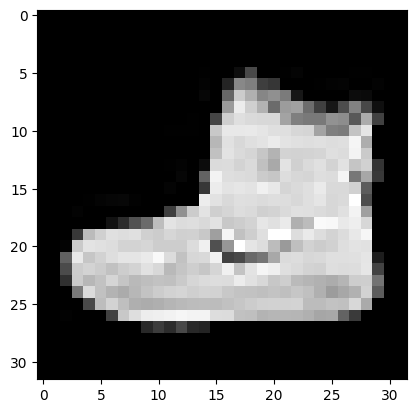

In [13]:
import matplotlib.pyplot as plt

# x_train 배열의 첫 번째 이미지 확인
plt.imshow(x_train[0], cmap='gray')  # Fashion MNIST 이미지는 그레이스케일이므로 cmap='gray' 사용
plt.show()

In [14]:
# (60000, 28, 28)
x_train.shape

(60000, 32, 32, 1)

# 변이형 오토인코더 만들기

In [15]:
help(K)

Help on package tensorflow.keras.backend in tensorflow.keras:

NAME
    tensorflow.keras.backend - DO NOT EDIT.

DESCRIPTION
    This file was autogenerated. Do not edit it by hand,
    since your modifications would be overwritten.

PACKAGE CONTENTS


FILE
    c:\programdata\anaconda3\envs\cvmaster\lib\site-packages\keras\_tf_keras\keras\backend\__init__.py




In [16]:
# DO NOT EDIT.

# This file was autogenerated. Do not edit it by hand, since your modifications would be overwritten.

# Functions
# abs(...): DEPRECATED.

# all(...): DEPRECATED.

# any(...): DEPRECATED.

# arange(...): DEPRECATED.

# argmax(...): DEPRECATED.

# argmin(...): DEPRECATED.

# backend(...): Publicly accessible method for determining the current backend.


# tf.keras.backend와 같은 모듈이 "deprecated"로 표시되었다는 것은,
# 해당 모듈이나 특정 함수가 더 이상 권장되지 않으며,
# 앞으로의 TensorFlow/Keras 버전에서 제거될 가능성이 높다는 의미입니다.
# 이러한 경우, 다음과 같은 사항들이 적용됩니다.

# 이유와 배경
# 모듈 개선: TensorFlow/Keras 팀은 API를 개선하고
# 사용자에게 더 직관적이고 일관된 방법을 제공하기 위해 기존 기능을 대체하고 있습니다.
# 따라서, 이전의 기능들이 deprecated되면서 새로운 기능을 사용하도록 권장합니다.

# 유지보수 비용: 코드의 복잡성과 유지보수 비용을 줄이기 위해,
# 오래된 함수나 모듈을 삭제하고 최신 방식으로 통합하는 것이 일반적입니다.

# 문서화 부족: deprecated된 기능은 문서화가 충분하지 않거나,
# 사용자들이 혼란을 겪을 수 있기 때문에 사용할 필요가 없도록 유도하고 있습니다.

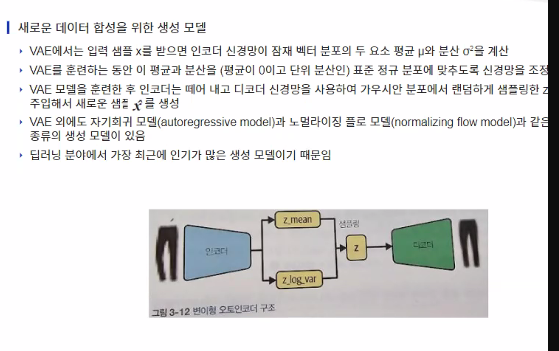

>z_mean

주변 영역에서 랜덤한 포인트를 샘플링

디코더는 재구성 손실이 작게 유지되도록 같은 영역에 위치한 포인트를 매우 비슷한 이미지로 디코딩해야 함

이는 잠재 공간에서 본 적이 없는 포인트를 선택하더라고 디코더가 제대로 된 이미지로 디코딩 할 가능성을  높이는 매우 휼륭한 성질

In [17]:
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [18]:
# 인코더
encoder_input = layers.Input(
    shape=(IMAGE_SIZE, IMAGE_SIZE, 1), name="encoder_input"
)
x = layers.Conv2D(32, (3, 3), strides=2, activation="relu", padding="same")(
    encoder_input
)
x = layers.Conv2D(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(128, (3, 3), strides=2, activation="relu", padding="same")(x)
shape_before_flattening = K.int_shape(x)[1:]  # 디코더에 필요합니다!

x = layers.Flatten()(x)
z_mean = layers.Dense(EMBEDDING_DIM, name="z_mean")(x)
z_log_var = layers.Dense(EMBEDDING_DIM, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])

encoder = models.Model(encoder_input, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input       │ (None, 32, 32, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 16, 16,    │        320 │ encoder_input[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 8, 8, 64)  │     18,496 │ conv2d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 4, 4, 128) │     73,856 │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 2048)      │          0 │ conv2d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 2)         │      4,098 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 2)         │      4,098 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling (Sampling) │ (None, 2)         │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 100,868 (394.02 KB)

 Trainable params: 100,868 (394.02 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# 디코더
decoder_input = layers.Input(shape=(EMBEDDING_DIM,), name="decoder_input")
x = layers.Dense(np.prod(shape_before_flattening))(decoder_input)
x = layers.Reshape(shape_before_flattening)(x)
x = layers.Conv2DTranspose(
    128, (3, 3), strides=2, activation="relu", padding="same"
)(x)
x = layers.Conv2DTranspose(
    64, (3, 3), strides=2, activation="relu", padding="same"
)(x)
x = layers.Conv2DTranspose(
    32, (3, 3), strides=2, activation="relu", padding="same"
)(x)
decoder_output = layers.Conv2D(
    1,
    (3, 3),
    strides=1,
    activation="sigmoid",
    padding="same",
    name="decoder_output",
)(x)

decoder = models.Model(decoder_input, decoder_output)
decoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 8, 8, 128)      │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_output (Conv2D)         │ (None, 32, 32, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 246,273 (962.00 KB)

 Trainable params: 246,273 (962.00 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
class VAE(models.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def call(self, inputs):
        """특정 입력에서 모델을 호출합니다."""
        z_mean, z_log_var, z = encoder(inputs)
        reconstruction = decoder(z)
        return z_mean, z_log_var, reconstruction

    def train_step(self, data):
        """훈련 스텝을 실행합니다."""
        with tf.GradientTape() as tape:
            z_mean, z_log_var, reconstruction = self(data)
            reconstruction_loss = tf.reduce_mean(
                BETA
                * losses.binary_crossentropy(
                    data, reconstruction, axis=(1, 2, 3)
                )
            )
            kl_loss = tf.reduce_mean(
#                 (function) def reduce_sum(
#     input_tensor: Any,
#     axis: Any | None = None,
#     keepdims: bool = False,
#     name: Any | None = None
# ) -> Any
# Computes the sum of elements across dimensions of a tensor.

# This is the reduction operation for the elementwise tf.math.add op.
                tf.reduce_sum(
                    -0.5
                    * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)),
                    axis=1,
                )
            )
            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {m.name: m.result() for m in self.metrics}

    def test_step(self, data):
        """Step run during validation."""
        if isinstance(data, tuple):
            data = data[0]

        z_mean, z_log_var, reconstruction = self(data)
        reconstruction_loss = tf.reduce_mean(
            BETA
            * losses.binary_crossentropy(data, reconstruction, axis=(1, 2, 3))
        )
        kl_loss = tf.reduce_mean(
            tf.reduce_sum(
                -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)),
                axis=1,
            )
        )
        total_loss = reconstruction_loss + kl_loss

        return {
            "loss": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss,
        }

    def get_config(self):
        return {}

In [21]:
vae=VAE(encoder,decoder)

In [22]:
vae

<VAE name=vae, built=False>

# 변이형 오토인코더 훈련

In [23]:
# 변이형 오토인코더 컴파일
optimizer = optimizers.Adam(learning_rate=0.0005)
vae.compile(optimizer=optimizer)

In [24]:
# 모델 저장 체크포인트 생성
model_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath="./checkpoint.keras",
    save_weights_only=False,
    save_freq="epoch",
    monitor="loss",
    mode="min",
    save_best_only=True,
    verbose=0,
)
tensorboard_callback = callbacks.TensorBoard(log_dir="./logs")

In [25]:
vae.fit(
    x_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    shuffle=True,
    validation_data=(x_test, x_test),
    callbacks=[model_checkpoint_callback, tensorboard_callback],
)

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - kl_loss: 3.6135 - reconstruction_loss: 197.9916 - total_loss: 201.6051 - val_kl_loss: 5.0581 - val_loss: 141.5247 - val_reconstruction_loss: 136.4666
Epoch 2/5
  5/600 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - kl_loss: 5.0038 - reconstruction_loss: 131.7496 - total_loss: 136.7533

c:\ProgramData\anaconda3\envs\cvmaster\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - kl_loss: 4.9480 - reconstruction_loss: 131.7981 - total_loss: 136.7461 - val_kl_loss: 4.9654 - val_loss: 138.1296 - val_reconstruction_loss: 133.1642
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - kl_loss: 5.0284 - reconstruction_loss: 129.4666 - total_loss: 134.4951 - val_kl_loss: 5.0347 - val_loss: 136.9471 - val_reconstruction_loss: 131.9124
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - kl_loss: 5.0609 - reconstruction_loss: 128.5359 - total_loss: 133.5968 - val_kl_loss: 5.1585 - val_loss: 135.7120 - val_reconstruction_loss: 130.5535
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - kl_loss: 5.0871 - reconstruction_loss: 127.6431 - total_loss: 132.7302 - val_kl_loss: 5.1630 - val_loss: 135.5896 - val_reconstruction_loss: 130.4266


In [26]:
vae.save(r"C:\ex\cvdir\keras_model\vae.keras")
encoder.save(r"C:\ex\cvdir\keras_model\encoder.keras")
decoder.save(r"C:\ex\cvdir\keras_model\decoder.keras")

# 변이형 오토인코더를 사용한 재구성

In [27]:
# 테스트셋의 일부를 선택합니다.
n_to_predict = 5000
example_images = x_test[:n_to_predict]
example_labels = y_test[:n_to_predict]

In [28]:
# 오토인코더 예측을 만들고 출력합니다.
z_mean, z_log_var, reconstructions = vae.predict(example_images)
print("실제 의류 아이템")
display(example_images)
print("재구성 이미지")
display(reconstructions)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
실제 의류 아이템


array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

재구성 이미지


array([[[[2.07349717e-06],
         [3.49341995e-08],
         [2.94727442e-08],
         ...,
         [3.02692404e-09],
         [1.80671211e-08],
         [2.61615151e-05]],

        [[2.61780322e-08],
         [7.02616298e-10],
         [1.99771266e-09],
         ...,
         [9.59712754e-10],
         [2.36283593e-09],
         [1.35189362e-06]],

        [[5.08995761e-08],
         [8.65416272e-09],
         [4.17884216e-08],
         ...,
         [1.07108667e-06],
         [2.73435518e-07],
         [2.62588237e-05]],

        ...,

        [[1.28884366e-07],
         [2.57186556e-08],
         [3.52443692e-07],
         ...,
         [8.47075000e-07],
         [2.59499995e-08],
         [1.22261508e-06]],

        [[1.37528914e-07],
         [2.55526995e-08],
         [8.55676561e-08],
         ...,
         [3.49734606e-08],
         [2.07351580e-09],
         [1.03969023e-06]],

        [[7.14030102e-05],
         [1.08899094e-05],
         [2.65046983e-05],
         ...,
 

# 인코더를 사용하여 임베딩

In [29]:
# 예제 이미지 인코딩
z_mean, z_var, z = encoder.predict(example_images)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [30]:
# 임베딩의 몇 가지 예
print(z[:10])

[[ 0.62602276 -1.3806334 ]
 [-0.89892405 -0.06342836]
 [-1.1880009   2.8180976 ]
 [ 0.07325271  2.1457758 ]
 [-0.13472423  0.13018142]
 [-0.70017403  1.6758493 ]
 [ 0.7497329   0.6008178 ]
 [ 0.19780096  0.30303803]
 [ 2.3761404  -0.11014268]
 [ 1.6973603  -0.8404903 ]]


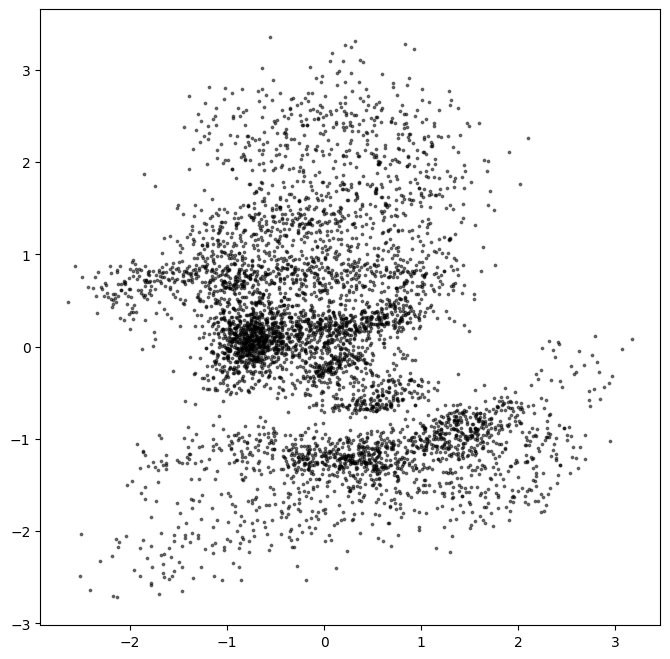

In [31]:
# 2D 공간에서 인코딩된 포인트 표시
figsize = 8

plt.figure(figsize=(figsize, figsize))
plt.scatter(z[:, 0], z[:, 1], c="black", alpha=0.5, s=3)
plt.show()

# 디코더를 사용하여 생성

In [32]:
# 표준 정규 분포에서 잠재 공간의 일부 포인트를 샘플링합니다.
grid_width, grid_height = (6, 3)
z_sample = np.random.normal(size=(grid_width * grid_height, 2))

In [33]:
# 샘플링된 포인트 디코딩
reconstructions = decoder.predict(z_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [34]:
# 원본 임베딩과 샘플링된 임베딩을 p값으로 변환하기
p = norm.cdf(z)
p_sample = norm.cdf(z_sample)

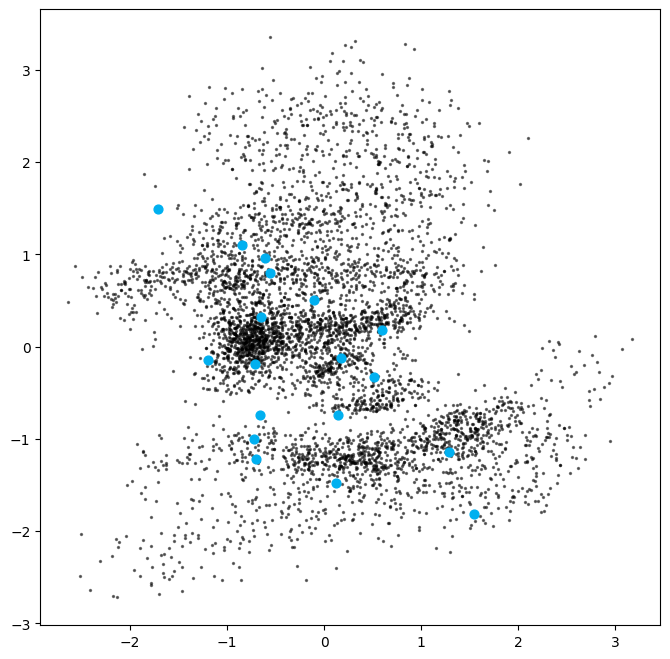

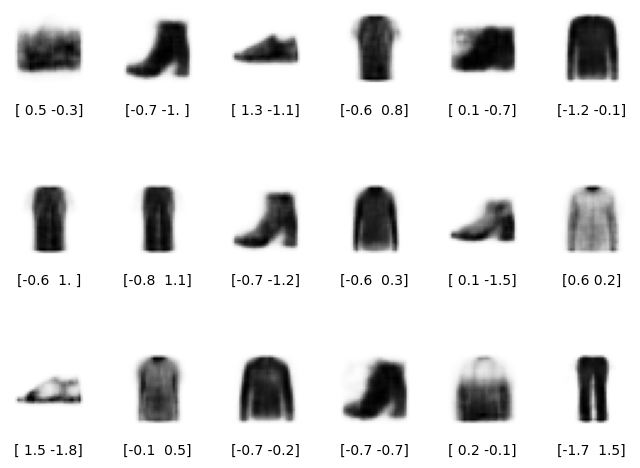

In [35]:
# 그래프를 그립니다....
figsize = 8
plt.figure(figsize=(figsize, figsize))

# ... 원본 임베딩 ...
plt.scatter(z[:, 0], z[:, 1], c="black", alpha=0.5, s=2)

# ... 잠재 공간에 새로 생성된 포인트
plt.scatter(z_sample[:, 0], z_sample[:, 1], c="#00B0F0", alpha=1, s=40)
plt.show()

# 디코딩된 이미지 그리드를 추가합니다.
fig = plt.figure(figsize=(figsize, grid_height * 2))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_width * grid_height):
    ax = fig.add_subplot(grid_height, grid_width, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        str(np.round(z_sample[i, :], 1)),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(reconstructions[i, :, :], cmap="Greys")

# 잠재 공간 탐색

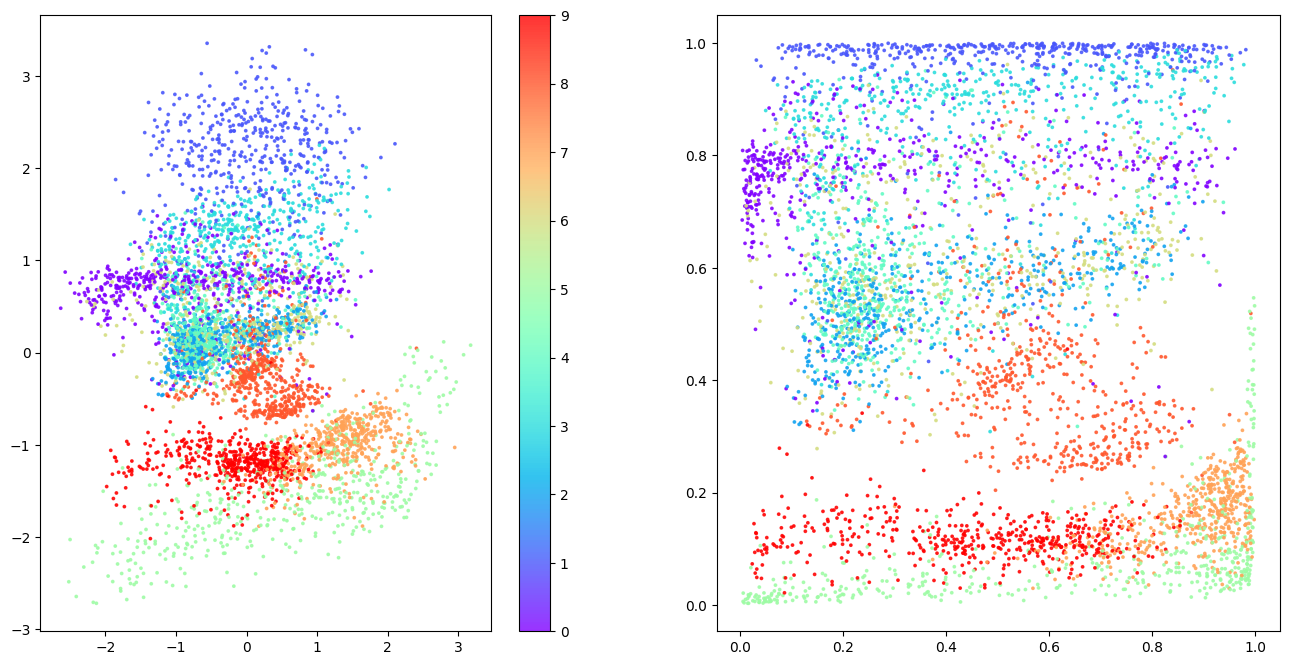

In [36]:
# 레이블(의류 종류)에 따라 임베딩에 색상을 지정합니다.
figsize = 8
fig = plt.figure(figsize=(figsize * 2, figsize))
ax = fig.add_subplot(1, 2, 1)
plot_1 = ax.scatter(
    z[:, 0], z[:, 1], cmap="rainbow", c=example_labels, alpha=0.8, s=3
)
plt.colorbar(plot_1)
ax = fig.add_subplot(1, 2, 2)
plot_2 = ax.scatter(
    p[:, 0], p[:, 1], cmap="rainbow", c=example_labels, alpha=0.8, s=3
)
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


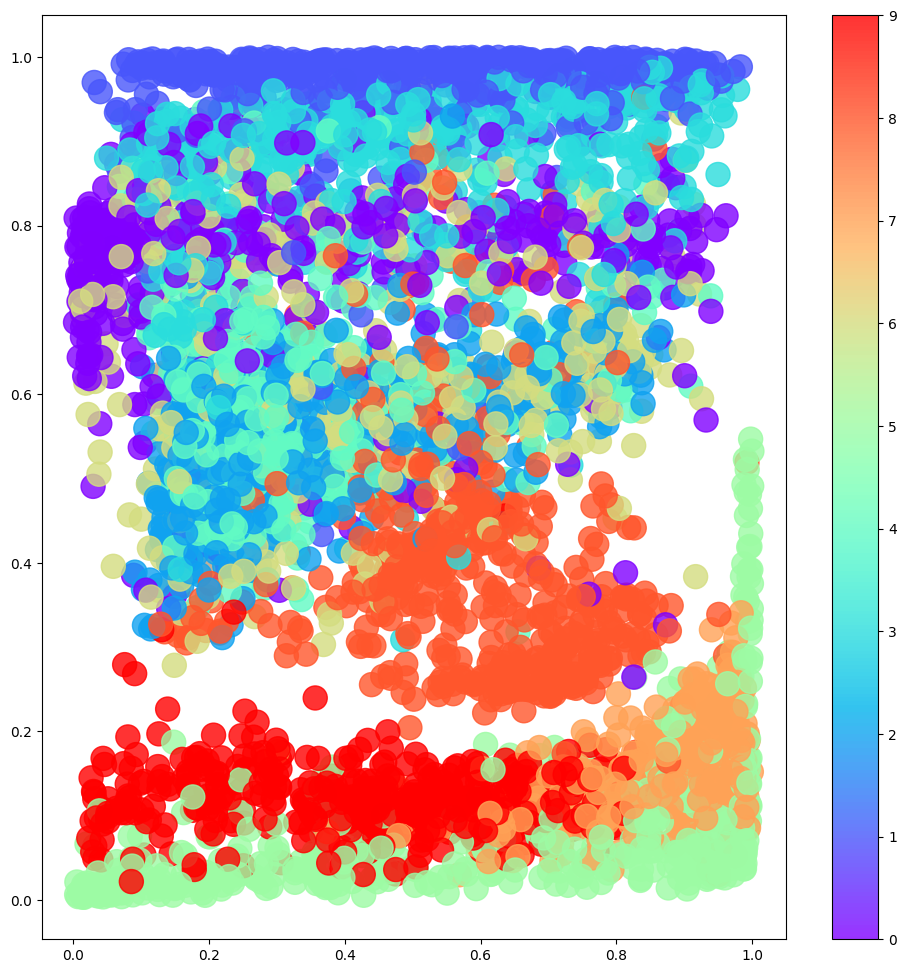

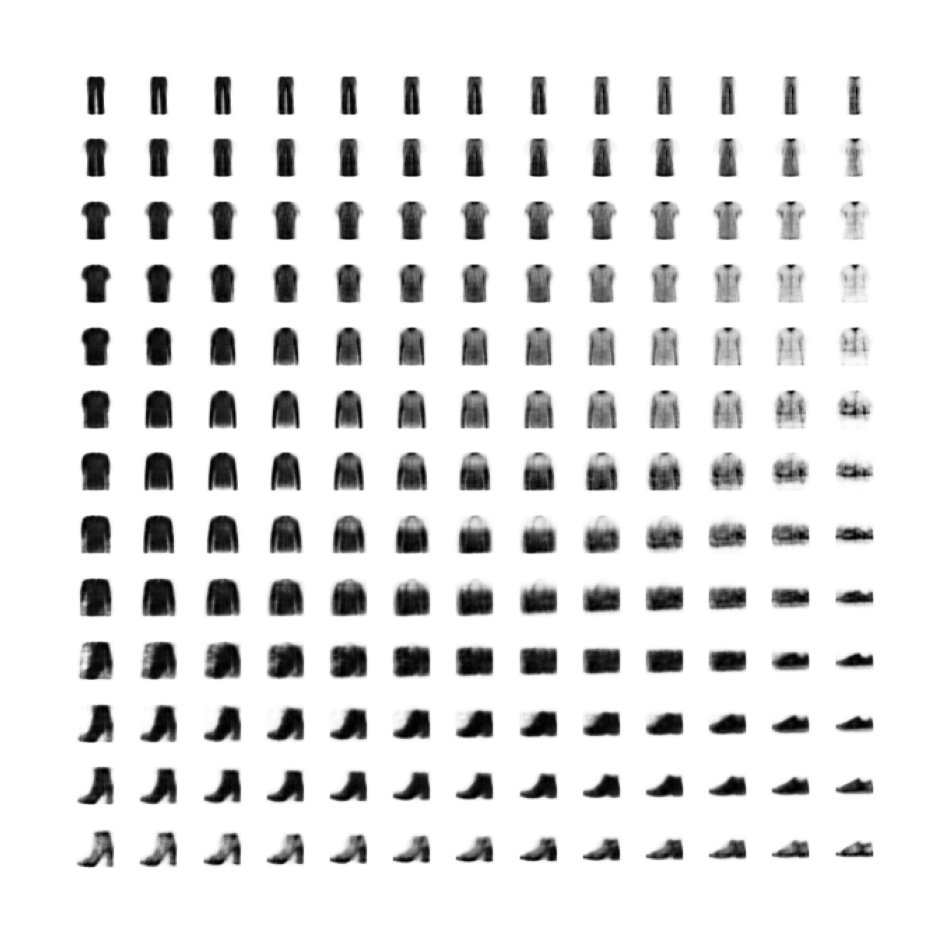

In [37]:
# 레이블(의류 종류)에 따라 임베딩에 색상을 지정합니다.
figsize = 12
grid_size = 15
plt.figure(figsize=(figsize, figsize))
plt.scatter(
    p[:, 0], p[:, 1], cmap="rainbow", c=example_labels, alpha=0.8, s=300
)
plt.colorbar()

x = norm.ppf(np.linspace(0, 1, grid_size))
y = norm.ppf(np.linspace(1, 0, grid_size))
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
grid = np.array(list(zip(xv, yv)))

reconstructions = decoder.predict(grid)
# plt.scatter(grid[:, 0], grid[:, 1], c="black", alpha=1, s=10)
plt.show()

fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i + 1)
    ax.axis("off")
    ax.imshow(reconstructions[i, :, :], cmap="Greys")